# Data Analysis
This program analyses data taken from a survey that asked subjects for their desire to kill bugs (on a scale from 0 to 10, 10 being the strongest desire to kill and 0 the weakest) of four different categories. The four different categories of bugs were differentiated by the Disgust and Fear that these bugs caused.

## Summary Statistics

In [156]:
import pandas
import matplotlib.pyplot
import statistics
import seaborn
import statsmodels.formula.api as smf

In [157]:
p_var_1 = 'Disgust'
p_var_2 = 'Fear'
o_var = 'KillRating'

try: 
    filepath = "bugs.csv"
    df = pandas.read_csv(filepath)
except FileNotFoundError:
    raise FileNotFoundError("""You can also download the data here: 
https://raw.githubusercontent.com/luketudge/stats-tutorials/master/tutorials/data/bugs.csv
and put it into your working directory for the code to work.""")
        
if df.columns[2] == p_var_1 and df.columns[3] == p_var_2 and df.columns[4] == o_var: 
    #checks whether the actual columns and the defined variables (referring to columns) are identical

        summary_df = {o_var: [statistics.mean, statistics.median, min, max, statistics.stdev]}
        grouped_df = df.groupby([p_var_1, p_var_2]).aggregate(summary_df)
        print("Summary statistics of the KillRatings for each type of bug:\n\n",grouped_df)

else:
    error_message = """The variables you defined are {}, {}, (the predictor variables) 
    and {} (outcome variable), whereas the respective columns in the DataFrame are {}, {} and {}. 
    Maybe check again whether {} stores the correct data or whether you defined the variables correctly"""
    raise ValueError(error_message.format(p_var_1, p_var_2, o_var, df.columns[2], df.columns[3], df.columns[4], filepath))
    

Summary statistics of the KillRatings for each type of bug:

              KillRating                            
                   mean median  min   max     stdev
Disgust Fear                                       
high    high   7.804598    8.5  0.0  10.0  2.495760
        low    6.660920    7.5  0.0  10.0  3.151683
low     high   7.339080    8.0  0.5  10.0  2.551213
        low    5.632184    6.0  0.0  10.0  2.680094


### further explanation of the code above
The code is of course applicable to other data sets with one outcome variable and two predictor variables. Everything one needs to do is to change the values of the variables p_var_1, p_var_2, o_var and, if necessary, filepath. The statistical analysis can also be extended by further predictor variables by just defining another variable (or several other variables) p_var_3 (in the dataset at hand for example the sex of the rater) and inserting it into the variable grouped_df like this: grouped_df = df.groupby([p_var_1, p_var_2, p_var_3]).aggregate(summary_df).

## Linear Model
In this linear model KillRating is the outcome variable and the categories of bugs are the predictor variables.

In [158]:
formula_kill = "KillRating ~ 1 + C(Disgust) + C(Fear)"
# adding 1 in the formula is redundant, since the ordinary least squares function
# also works without it. However, I decided to keep it for the sake of clarity and 
# in case there is a program that doesn't automatically search for a constant value
# keeping the 1 in this formula makes this program more easy to implement for others.
# With the same thought I added the C() to Disgust and Fear, which communicates
# the program that the variable at hand is a categorical one. 
m_kill = smf.ols(formula_kill, data = df).fit()
print("""\n\nThe results of a linear model with kill rating as the outcome variable 
and the categories of bug as the predictor variables:\n\n""", m_kill.summary())
low_low = m_kill.params[0] + m_kill.params[1] + m_kill.params[2]
low_high = m_kill.params[0] + m_kill.params[1]
high_low = m_kill.params[0] + m_kill.params[2]
high_high = m_kill.params[0]
print("""\n\nmodel-based predictions (for a model with one outcome variable and two categorical
predictor variables that can reasonably be combined into 4 categories):\ncategory_1: """, low_low,
"\ncategory_2: ", low_high, "\ncategory_3: ", high_low, "\ncategory_4: ", high_high)



The results of a linear model with kill rating as the outcome variable 
and the categories of bug as the predictor variables:

                             OLS Regression Results                            
Dep. Variable:             KillRating   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     15.10
Date:                Fri, 13 Mar 2020   Prob (F-statistic):           5.18e-07
Time:                        18:29:54   Log-Likelihood:                -841.99
No. Observations:                 348   AIC:                             1690.
Df Residuals:                     345   BIC:                             1702.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0

### further explanation of the above model
linear model underlying the calculations in this specific task: KillRating = 7.95 - 0.75 * Disgust - 1.43 * Fear (where Disgust and Fear take the value 1 if low and 0 if high). <br>
In the four model-based predictions above, instead of naming the predictions after the specific types of bugs, I gave the predictions generic names. I did this for the sake of generalizability. The code will always pick the coefficients calculated with the ordinary least squares method and works for other tasks with one outcome variable and two categorical predictor variables that can reasonably be combined into 4 categories just as good. In this specific case category_1 corresponds to the bug type low_low, category_2 to low_high, category_3 to high_low and category_4 to high_high.

## Boxplots

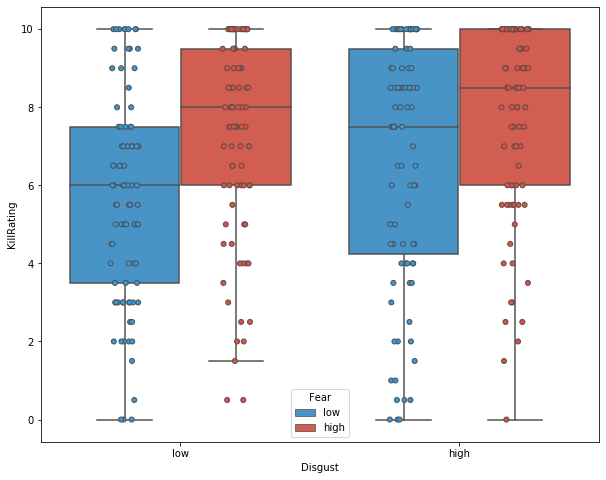

In [159]:
matplotlib.pyplot.figure(figsize=(10,8))
bp = seaborn.boxplot(x = 'Disgust', y = 'KillRating', hue = 'Fear', palette = ["#3498db", "#e74c3c"], data = df, showfliers = False)

bp = seaborn.stripplot(x = 'Disgust', y = 'KillRating', hue = 'Fear', dodge = True, palette = ["#3498db", "#e74c3c"],data = df, linewidth=1)
handles, labels = bp.get_legend_handles_labels() # get legend information from the plot object
legend = matplotlib.pyplot.legend(handles[0:2], labels[0:2], title = 'Fear', loc = 8) # specify just one legend
matplotlib.pyplot.savefig('bp.svg')
# solutions taken from seaborn documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html ; 
# https://seaborn.pydata.org/generated/seaborn.swarmplot.html and a forum: 
# https://cmdlinetips.com/2019/03/how-to-make-grouped-boxplots-in-python-with-seaborn/

In [160]:
if __name__ == '__main__':
    print('example sentence')

example sentence
